In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as mp
from matplotlib import pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",1000)
pd.set_option('display.max_rows', 17544) 
# Configuring plotting visual and sizes
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
import scipy

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/JattievdLinde/insights/main/data/Data.log')
df.head()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(['Timestamp'])

In [4]:
df.describe()

,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,HeliumPressure,StackTC,MagnetTC,PressureControl,RGAChannel1,RGAChannel2,RGAChannel3,RGAChannel4,RGAChannel5,RGAChannel6
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.0,2104.0,2104.0,2104.000000,2104.0,2104.0,2104.0,2104.0,2104.0,2104.0
mean,17.493335,173.774715,203.740019,203.037072,203.281369,0.106056,0.000050,-0.118089,-0.000029,0.607615,7.666302,12.946863,8.827091,41.151564,40.742923,52.850109,53.466730,2.805109,2.747034,2.823432,2.648094,0.0,594.0,0.0,17.511056,0.0,0.0,0.0,0.0,0.0,0.0
std,89.872384,143.291909,108.248228,109.237301,107.495532,0.140798,0.000219,0.006754,0.000377,0.481582,7.182892,9.318923,7.573806,0.032935,0.030673,0.010550,0.011475,0.006678,0.004712,0.005754,0.004001,0.0,0.0,0.0,89.868934,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,20.000000,20.000000,20.000000,-0.040000,0.000000,-0.140000,-0.005000,0.000000,0.000000,0.000000,0.000000,41.080000,40.670000,52.820000,53.440000,2.790000,2.740000,2.810000,2.640000,0.0,594.0,0.0,0.021000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000001,0.000000,84.000000,81.000000,86.000000,0.004000,0.000000,-0.120000,0.000000,0.000000,0.000000,7.175000,0.000000,41.130000,40.720000,52.840000,53.460000,2.800000,2.740000,2.820000,2.650000,0.0,594.0,0.0,0.027000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000003,300.000000,281.000000,277.000000,278.000000,0.004000,0.000000,-0.120000,0.000000,1.000000,10.300000,13.100000,12.500000,41.150000,40.740000,52.850000,53.470000,2.810000,2.750000,2.820000,2.650000,0.0,594.0,0.0,0.029000,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.994000,300.000000,300.000000,301.000000,300.000000,0.300000,0.000000,-0.120000,0.000000,1.000000,10.600000,16.300000,13.300000,41.170000,40.760000,52.860000,53.480000,2.810000,2.750000,2.830000,2.650000,0.0,594.0,0.0,9.994000,0.0,0.0,0.0,0.0,0.0,0.0
max,762.900000,300.000000,300.000000,301.000000,301.000000,0.301000,0.001000,-0.060000,0.000000,1.000000,29.400000,40.000000,30.400000,41.230000,40.810000,52.890000,53.490000,2.830000,2.760000,2.840000,2.660000,0.0,594.0,0.0,762.900000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.head(10)

,Timestamp,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,PiraniGauge,Element,HeliumPressure,StackTC,MagnetTC,PressureControl,RGAChannel1,RGAChannel2,RGAChannel3,RGAChannel4,RGAChannel5,RGAChannel6
0,2022-09-15 11:36:17.844,762.5,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.84,53.45,2.80,2.74,2.82,2.64,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-15 11:36:27.844,762.2,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.79,2.74,2.82,2.64,A AE+02,,0,594,0,762.2,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-15 11:36:37.828,762.7,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-15 11:36:47.836,762.6,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.6,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-15 11:36:57.828,762.7,0,22,22,22,0.004,0.0,-0.14,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-09-15 11:37:07.844,762.4,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.4,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-09-15 11:37:17.836,762.5,0,22,22,22,0.003,0.0,-0.14,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.83,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-09-15 11:37:27.844,762.5,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.83,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-09-15 11:37:37.844,762.8,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.15,40.71,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.8,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-09-15 11:37:47.836,762.7,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.15,40.71,52.84,53.46,2.80,2.74,2.82,2.64,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pd.DataFrame(df.columns,columns =['List of Columns'])

,List of Columns
0,Timestamp
1,Pressure
2,ProductTemp
3,Top
4,Middle
5,Bottom
6,Gas1
7,Gas2
8,Gas3
9,Gas4


In [7]:
df.nunique()

Timestamp          2104
Pressure            237
ProductTemp         198
Top                 280
Middle              282
Bottom              282
Gas1                  7
Gas2                  2
Gas3                  4
Gas4                  2
Field                86
PSUTop              198
PSUMiddle           323
PSUBottom           217
TempChannel1         16
TempChannel2         15
TempChannel3          8
TempChannel4          6
TempChannel5          5
TempChannel6          3
TempChannel7          4
TempChannel8          3
PiraniGauge          33
Element               3
HeliumPressure        1
StackTC               1
MagnetTC              1
PressureControl     140
RGAChannel1           1
RGAChannel2           1
RGAChannel3           1
RGAChannel4           1
RGAChannel5           1
RGAChannel6           1
dtype: int64

In [8]:
df = df.drop(columns=['PressureControl','StackTC','MagnetTC','HeliumPressure','RGAChannel1', 'RGAChannel2','RGAChannel3','RGAChannel4', 'RGAChannel5','RGAChannel6'])

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,Timestamp,0.0
1,Pressure,0.0
2,ProductTemp,0.0
3,Top,0.0
4,Middle,0.0
5,Bottom,0.0
6,Gas1,0.0
7,Gas2,0.0
8,Gas3,0.0
9,Gas4,0.0


In [10]:
df['PiraniGauge'].unique()

array([' A AE+02', ' 4.8E+00', ' 3.6E-01', ' 1.7E-01', ' 1.1E-01',
       ' 8.2E-02', ' 6.7E-02', ' 6.6E-02', ' 5.2E-02', ' 4.6E-02',
       ' 4.3E-02', ' 4.0E-02', ' 3.8E-02', ' 3.6E-02', ' 3.4E-02',
       ' 3.3E-02', ' 3.2E-02', ' 3.1E-02', ' 3.0E-02', ' 2.9E-02',
       ' 2.8E-02', ' 2.7E-02', ' 2.6E-02', ' 2.5E-02', ' 2.4E-02',
       ' 2.3E-02', ' 2.2E-02', ' 2.1E-02', ' 2.0E-02', ' 1.9E-02',
       ' 1.8E-02', ' 1.7E-02', ' 1.6E-02'], dtype=object)

**A AE+02** -> AA is Hexadecimal value which is when converted to decimal results 1.7. Therefore replacing AA as 1.7

In [11]:
df['PiraniGauge'] = df['PiraniGauge'].str.strip()
df['PiraniGauge'] = df['PiraniGauge'].str.replace("A A","1.7")
df['PiraniGauge'] = df['PiraniGauge'].astype(float)
df['PiraniGauge'].unique()

array([1.7e+02, 4.8e+00, 3.6e-01, 1.7e-01, 1.1e-01, 8.2e-02, 6.7e-02,
       6.6e-02, 5.2e-02, 4.6e-02, 4.3e-02, 4.0e-02, 3.8e-02, 3.6e-02,
       3.4e-02, 3.3e-02, 3.2e-02, 3.1e-02, 3.0e-02, 2.9e-02, 2.8e-02,
       2.7e-02, 2.6e-02, 2.5e-02, 2.4e-02, 2.3e-02, 2.2e-02, 2.1e-02,
       2.0e-02, 1.9e-02, 1.8e-02, 1.7e-02, 1.6e-02])

In [12]:
df['Element'] = df['Element'].str.strip()
print(df['Element'].value_counts())
df=df.replace("","Vacuum")
print(df['Element'].value_counts())

Vacuum    1275
He         775
            54
Name: Element, dtype: int64
Vacuum    1329
He         775
Name: Element, dtype: int64


In [13]:
df.sample(100)

,Timestamp,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,PiraniGauge,Element
1697,2022-09-15 16:19:07.836,9.994000e+00,0,91,87,93,0.300,0.000,-0.10,0.000,1.000,0.0,11.6,0.0,41.14,40.73,52.86,53.47,2.80,2.75,2.82,2.65,170.000,He
731,2022-09-15 13:38:07.891,1.300000e-06,300,299,300,299,0.004,0.000,-0.12,0.000,1.000,10.4,13.8,13.0,41.10,40.74,52.85,53.47,2.80,2.75,2.83,2.65,0.017,Vacuum
101,2022-09-15 11:53:07.844,6.900000e-06,95,28,27,26,0.004,0.000,-0.12,0.000,0.000,17.7,40.0,13.7,41.15,40.72,52.84,53.45,2.79,2.74,2.82,2.64,0.025,Vacuum
1412,2022-09-15 15:31:37.836,1.000000e+01,0,234,228,229,0.300,0.000,-0.12,0.000,1.000,0.0,0.0,0.0,41.21,40.79,52.86,53.47,2.81,2.75,2.82,2.65,170.000,He
2019,2022-09-15 17:12:47.836,9.995000e+00,0,44,43,47,0.300,0.001,-0.12,0.000,0.000,0.0,0.0,0.0,41.13,40.74,52.87,53.49,2.82,2.75,2.83,2.65,170.000,He
1003,2022-09-15 14:23:27.836,1.000000e-06,300,300,301,300,0.004,0.000,-0.12,0.000,1.000,10.3,12.9,12.6,41.19,40.78,52.85,53.46,2.80,2.75,2.83,2.65,0.017,Vacuum
1626,2022-09-15 16:07:17.836,9.981000e+00,0,111,107,113,0.300,0.000,-0.12,0.000,1.000,0.0,22.7,0.0,41.17,40.76,52.86,53.48,2.81,2.75,2.82,2.65,170.000,He
887,2022-09-15 14:04:07.836,1.200000e-06,300,300,301,300,0.004,0.000,-0.12,0.000,1.000,10.3,13.1,12.8,41.20,40.80,52.85,53.47,2.80,2.75,2.83,2.65,0.017,Vacuum
1268,2022-09-15 15:07:37.836,7.400000e-07,300,300,301,301,0.004,0.000,-0.12,0.000,1.000,10.4,12.5,12.5,41.16,40.74,52.85,53.47,2.81,2.75,2.83,2.65,0.017,Vacuum
967,2022-09-15 14:17:27.836,1.100000e-06,300,300,301,300,0.004,0.000,-0.12,0.000,1.000,10.3,12.9,12.7,41.19,40.78,52.85,53.47,2.81,2.75,2.83,2.65,0.017,Vacuum


In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,PiraniGauge
Pressure,1.000000,-0.234597,-0.278433,-0.276665,-0.278769,-0.061745,-0.013761,-0.008193,-0.000495,-0.187348,-0.206993,-0.238631,-0.224973,-0.109147,-0.099150,0.070915,0.088567,0.052074,0.007968,0.070656,0.051339,0.242656
ProductTemp,-0.234597,1.000000,0.857915,0.866834,0.856311,-0.830205,-0.204999,-0.051198,0.000630,0.040643,0.759364,0.405126,0.869210,-0.247463,-0.208205,-0.609067,-0.579822,-0.224398,-0.269262,0.081520,-0.240717,-0.922435
Top,-0.278433,0.857915,1.000000,0.999772,0.999676,-0.570636,-0.138631,-0.035537,-0.011438,0.342237,0.460217,0.174875,0.603636,0.060253,0.120404,-0.389150,-0.366593,-0.099527,-0.025266,0.054691,-0.068389,-0.706436
Middle,-0.276665,0.866834,0.999772,1.000000,0.999492,-0.583171,-0.141723,-0.036629,-0.011417,0.334115,0.470890,0.178070,0.614241,0.049012,0.111463,-0.396614,-0.373750,-0.101353,-0.030900,0.061304,-0.071577,-0.716809
Bottom,-0.278769,0.856311,0.999676,0.999492,1.000000,-0.565797,-0.137588,-0.034303,-0.010666,0.352026,0.446384,0.163284,0.592516,0.061318,0.129173,-0.377181,-0.353541,-0.088366,-0.010762,0.065931,-0.059358,-0.701834
Gas1,-0.061745,-0.830205,-0.570636,-0.583171,-0.565797,1.000000,0.248733,0.070097,0.015095,0.207612,-0.743946,-0.387785,-0.791847,0.332704,0.369466,0.707050,0.684316,0.329392,0.446200,-0.061011,0.345736,0.904250
Gas2,-0.013761,-0.204999,-0.138631,-0.141723,-0.137588,0.248733,1.000000,0.012059,0.017445,0.057353,-0.187674,-0.116795,-0.199781,0.104549,0.121891,0.164483,0.169830,0.103638,0.121944,-0.005192,0.088026,0.224750
Gas3,-0.008193,-0.051198,-0.035537,-0.036629,-0.034303,0.070097,0.012059,1.000000,0.002737,0.099522,-0.041959,0.016332,-0.048257,-0.032251,-0.004477,0.101178,0.094158,0.049141,0.100449,0.012300,0.085565,0.052639
Gas4,-0.000495,0.000630,-0.011438,-0.011417,-0.010666,0.015095,0.017445,0.002737,1.000000,0.003820,-0.001586,0.004852,-0.000146,-0.023238,-0.021595,0.006769,0.005920,0.010694,0.005909,0.001293,-0.004530,0.009048
Field,-0.187348,0.040643,0.342237,0.334115,0.352026,0.207612,0.057353,0.099522,0.003820,1.000000,-0.267385,-0.126984,-0.195095,0.425799,0.623839,0.379769,0.430294,0.314111,0.701853,0.257154,0.570357,0.083748


In [15]:
fig = px.line(df, x='Timestamp', y="ProductTemp")
fig.show()

In [16]:
fig = px.line(df, x='Timestamp', y="PSUTop")
fig.show()

In [17]:
fig = px.line(df, x='Timestamp', y="Field")
fig.show()

<AxesSubplot:xlabel='Element', ylabel='ProductTemp'>

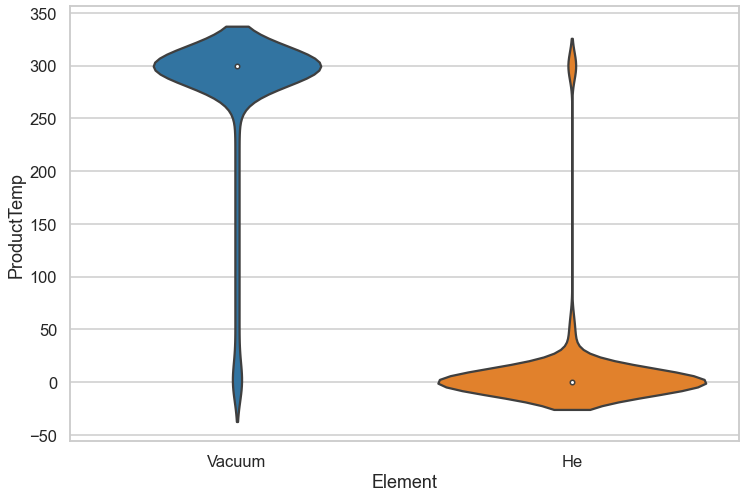

In [18]:

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Element', y='ProductTemp', data=df)


<AxesSubplot:xlabel='Element', ylabel='Pressure'>

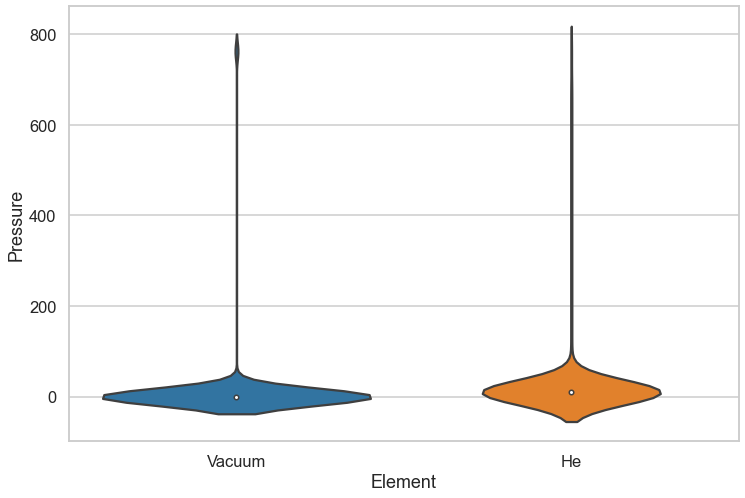

In [19]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Element', y='Pressure', data=df)

<AxesSubplot:xlabel='PSUMiddle', ylabel='Count'>

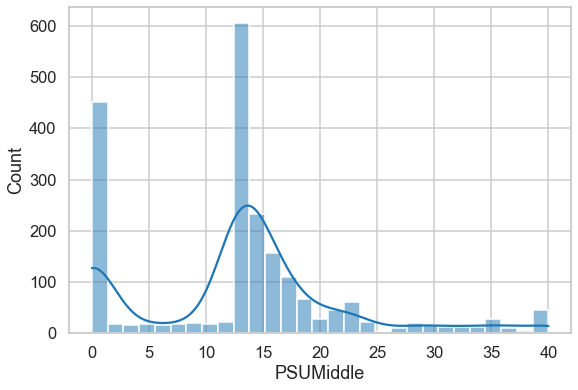

In [20]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='PSUMiddle',
             kde=True) # Plot the density curve too

In [21]:
avg_temp_element = df.groupby(['Element'])['ProductTemp','Pressure','TempChannel1','Field','Top','PSUTop','PSUMiddle','PSUBottom'].mean().reset_index()
avg_temp_element

,Element,ProductTemp,Pressure,TempChannel1,Field,Top,PSUTop,PSUMiddle,PSUBottom
0,He,9.660645,32.689895,41.163639,0.699498,114.000000,0.298968,7.479742,0.545419
1,Vacuum,269.477050,8.631533,41.144522,0.554034,256.071482,11.962528,16.134989,13.656509


In [22]:
conditions = [
    (df['Element'] == "He"),
   (df['Element'] == "Vacuum")
    ]
values = [0,1]
df['Element'] = np.select(conditions, values)

In [23]:
df.columns

Index(['Timestamp', 'Pressure', 'ProductTemp', 'Top', 'Middle', 'Bottom',
       'Gas1', 'Gas2', 'Gas3', 'Gas4', 'Field', 'PSUTop', 'PSUMiddle',
       'PSUBottom', 'TempChannel1', 'TempChannel2', 'TempChannel3',
       'TempChannel4', 'TempChannel5', 'TempChannel6', 'TempChannel7',
       'TempChannel8', 'PiraniGauge', 'Element'],
      dtype='object')

In [24]:
X_class = np.array(df[['ProductTemp','Pressure','TempChannel1','Field','Top', 'Middle', 'Bottom','PSUTop','PSUMiddle','PSUBottom','Gas1','PiraniGauge']])
Y_class = np.array(df[['Element']])

# Transformed dataset is randomly split into 70:30 to accommodate the training and testing phases
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(X_class,Y_class, test_size = 0.4,random_state=0)
print("X_train has these samples:", x_train_class.shape)
print("X_test has these samples:", x_test_class.shape)
print("Y_train has these samples:", len(y_train_class))
print("Y_train has these samples:", len(y_test_class))

X_train has these samples: (1262, 12)
X_test has these samples: (842, 12)
Y_train has these samples: 1262
Y_train has these samples: 842


In [25]:
classification_models = ["Random Forest","Decision Tree","K-Nearest Neighbours","LDA","Logistic Regression","Naive Bayes"]

classifiers = [
    RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(weights='distance'),
    LogisticRegression(),
    LinearDiscriminantAnalysis(n_components=1),
    GaussianNB()
    ]


for name, model in zip(classification_models, classifiers):
    model.fit(x_train_class, y_train_class)
    y_pred_class = model.predict(x_test_class)
    print (name, "Model")
    print("% Accuracy for ",name," is ",metrics.accuracy_score(y_test_class, y_pred_class) * 100)
    print("Precision Score ",name," is ",metrics.precision_score(y_test_class, y_pred_class, average='weighted', labels=np.unique(y_pred_class)))
    print("Recall Score ",name," is ",metrics.recall_score(y_test_class, y_pred_class, average='weighted'))
    print("F1-Score Score ",name," is ",metrics.f1_score(y_test_class, y_pred_class, average='weighted', labels=np.unique(y_pred_class)))
    print("Evaluating Cross Validation")
    scores = cross_val_score(model, X_class, Y_class, cv=5)
    print("Scores:", scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print ("mean score and 95% confidence interval of the score estimate are given by")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("*------------END-----------*")
    


Random Forest Model
% Accuracy for  Random Forest  is  100.0
Precision Score  Random Forest  is  1.0
Recall Score  Random Forest  is  1.0
F1-Score Score  Random Forest  is  1.0
Evaluating Cross Validation
Scores: [0.58669834 1.         1.         1.         1.        ]
0.92 accuracy with a standard deviation of 0.17
mean score and 95% confidence interval of the score estimate are given by
Accuracy: 0.92 (+/- 0.33)
*------------END-----------*
Decision Tree Model
% Accuracy for  Decision Tree  is  99.8812351543943
Precision Score  Decision Tree  is  0.9988145227477018
Recall Score  Decision Tree  is  0.998812351543943
F1-Score Score  Decision Tree  is  0.9988118900627708
Evaluating Cross Validation
Scores: [0.20665083 1.         1.         1.         0.88571429]
0.82 accuracy with a standard deviation of 0.31
mean score and 95% confidence interval of the score estimate are given by
Accuracy: 0.82 (+/- 0.62)
*------------END-----------*
K-Nearest Neighbours Model
% Accuracy for  K-Neares

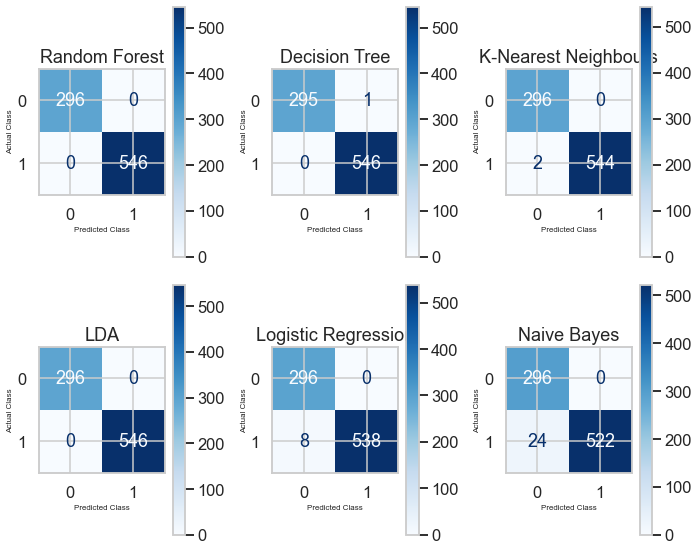

In [26]:
# Generating confusion matrix and visualising using heatmap    
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
for model, ax, name in zip(classifiers, axes.flatten(), classification_models):
    plot_confusion_matrix(model, x_test_class, y_test_class, ax=ax, values_format=None, cmap='Blues', include_values=True)
    ax.title.set_text(name)  
    ax.set_xlabel('Predicted Class', fontsize=8)
    ax.set_ylabel('Actual Class', fontsize=8)

plt.tight_layout()
plt.show()